# Bay Wheels Ride Data Exploration and Visualization
## by Moses Okonji

## Preliminary Wrangling

[Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) is used to be known as Ford GoBike. It is a regional public bike sharing system in the San Francisco Bay Area, California and the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 1,000,000 rides since the launch in 2017. It had about 10,000 annual subscribers as of January 2018. The dataset used for this exploratory analysis consists of monthly individual trip data for the year 2018 covering the greater San Francisco Bay area. The data is available [here](https://s3.amazonaws.com/baywheels-data/index.html).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Gathering and Assessing Data

In [2]:
# import and append all monthly trip data together

folder_name = 'complete_trip_data'
data = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
df = pd.concat(data, ignore_index=True)

In [3]:
# save the appended result to a .csv for future use

df.to_csv('Bay_Wheels_Ride_Data_2018.csv', index=False)

In [5]:
# load data
data = pd.read_csv('Bay_wheels_ride_data_2018.csv')

### Cleaning Data

In [13]:
# make a copy of the dataframe

data_clean = data.copy()

In [14]:
# Drop null values

data_clean = data_clean.dropna()

In [16]:
 
# fix the fields with wrong data types

data_clean['start_time'] = pd.to_datetime(data_clean['start_time'])
data_clean['end_time'] = pd.to_datetime(data_clean['end_time'])

data_clean['start_station_id'] = data_clean['start_station_id'].astype(np.object)
data_clean['end_station_id'] = data_clean['end_station_id'].astype(np.object)
data_clean['bike_id'] = data_clean['bike_id'].astype(np.object)

data_clean['user_type'] = data_clean['user_type'].astype('category')
data_clean['member_gender'] = data_clean['member_gender'].astype('category')
data_clean['member_birth_year'] = data_clean['member_birth_year'].astype('int')

### Feature Engineering

In [18]:
# Display the trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day,day of week and month

data_clean['duration_minute'] = data_clean['duration_sec']/60

data_clean['start_date'] = data_clean.start_time.dt.strftime('%Y-%m-%d')
data_clean['start_hourofday'] = data_clean.start_time.dt.strftime('%H')
data_clean['start_dayofweek'] = data_clean.start_time.dt.strftime('%A')
data_clean['start_month'] = data_clean.start_time.dt.strftime('%B')

data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,1986,Male,No,1254.733333,2018-01-31,22,Wednesday,January
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,3039,Customer,1996,Male,No,1192.933333,2018-01-31,14,Wednesday,January
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,617,Subscriber,1991,Male,No,666.100000,2018-01-31,19,Wednesday,January
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,...,3571,Subscriber,1988,Male,No,7.550000,2018-01-31,23,Wednesday,January
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,...,1403,Subscriber,1980,Male,No,3.000000,2018-01-31,23,Wednesday,January


In [19]:
# We derive a new column, member_age from the member birth year

data_clean['member_age'] = 2020 - data_clean['member_birth_year']

In [20]:
# cast 'start_dayofweek' to category dtype
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
data_clean['start_dayofweek'] = data_clean['start_dayofweek'].astype(weekdaycat)

In [21]:
# cast 'start_month' to category dtype

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
data_clean['start_month'] = data_clean['start_month'].astype(monthcat)

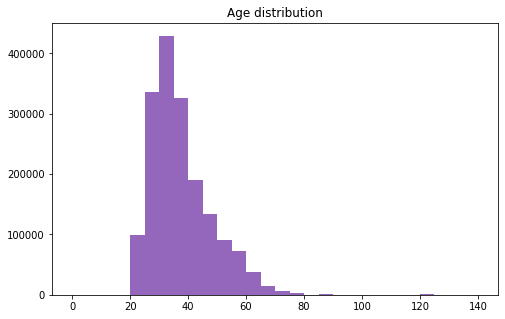

In [23]:
# start with a histogram to see distribution and visually examine for some outliers over 100 yrs old
base_color = sns.color_palette()[4]
                                 
fig, ax = plt.subplots(figsize=[8, 5])
bins = np.arange(0,data_clean['member_age'].max()+5, 5)
plt.hist(data = data_clean, x = 'member_age', bins = bins, color = base_color)
plt.title('Age distribution');

#### From the histogram above, we need to filter out outlier ages

In [24]:
data_clean = data_clean.query('member_age <= 70')

In [25]:
data_clean.shape

(1732368, 22)

In [26]:
#data_clean.to_csv("master_data_frame.csv", sep=',', encoding='utf-8', index=False)

### What is the structure of your dataset?

The original combined data contains approximately 1,860,000 individual trip records with 14 variables collected. The cleaned and engineered data contains 1,732,368 observations and 22 variables. The variables can be divided into 3 major categories:
- trip duration: `duration_sec`, `start_time`, `end_time`


- station info: `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`


- member info : `bike_id`, `user_type`, `member_birth_year`, `member_gender`, `bike_share_for_all_trip`

Derived features to aid exploration and analysis:
- trip info: `duration_minute`, `start_date`, `start_hourofday`, `start_dayofweek`, `start_month`


- member: `member_age`

### What is/are the main feature(s) of interest in your dataset?

- I'm very excited to explore the bike trips' duration and rental events occurrence patterns with respect to variables such as user type, gender and age. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Trip's start date/time, distance and duration. 
- The member information like user type, gender and age will help us find out who are the main target customer groups.

## Univariate Exploration

#### Bike trip distribution over hours of the day

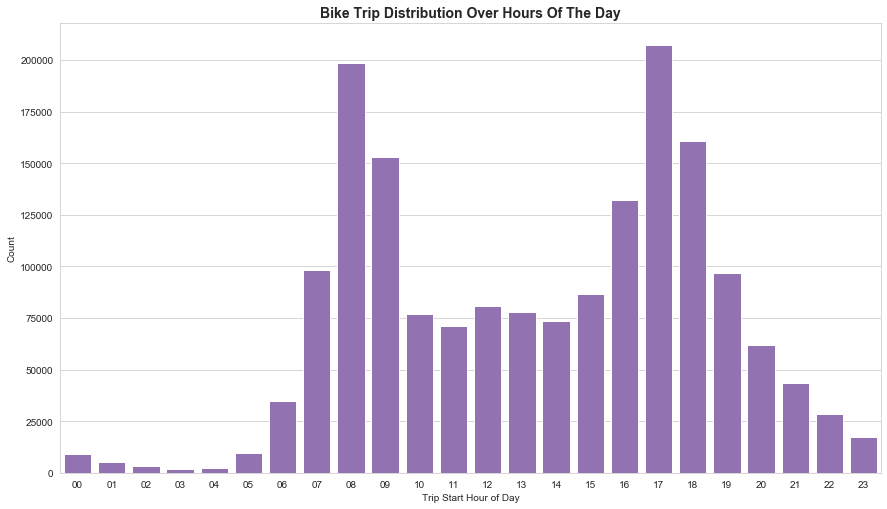

In [28]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = [14.70, 8.27])
sns.countplot(data= data_clean, x='start_hourofday', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');
plt.title('Bike trip distribution over hours of the day'.title(),fontsize = 14, weight = 'bold');

#### Bike trip distribution over wekdays

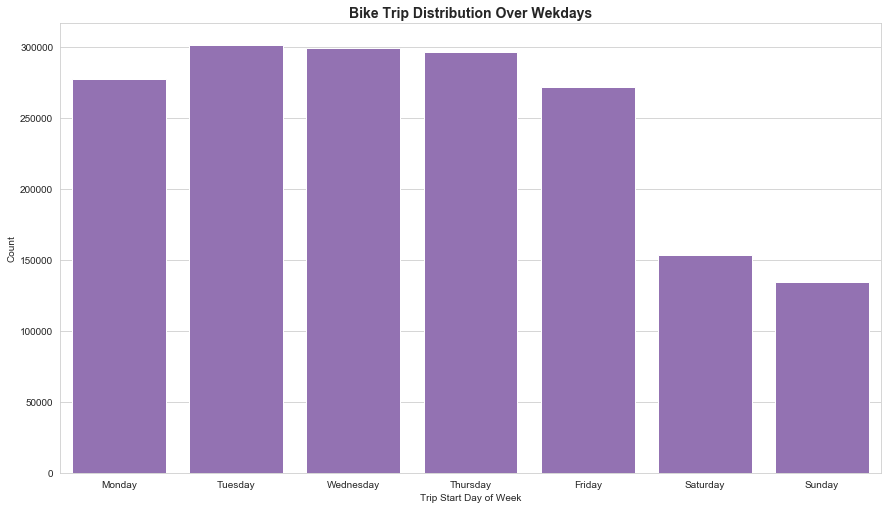

In [29]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = [14.70, 8.27])
sns.countplot(data= data_clean, x='start_dayofweek', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');
plt.title('Bike trip distribution over wekdays'.title(),fontsize = 14, weight = 'bold');

#### Bike trip distribution over months

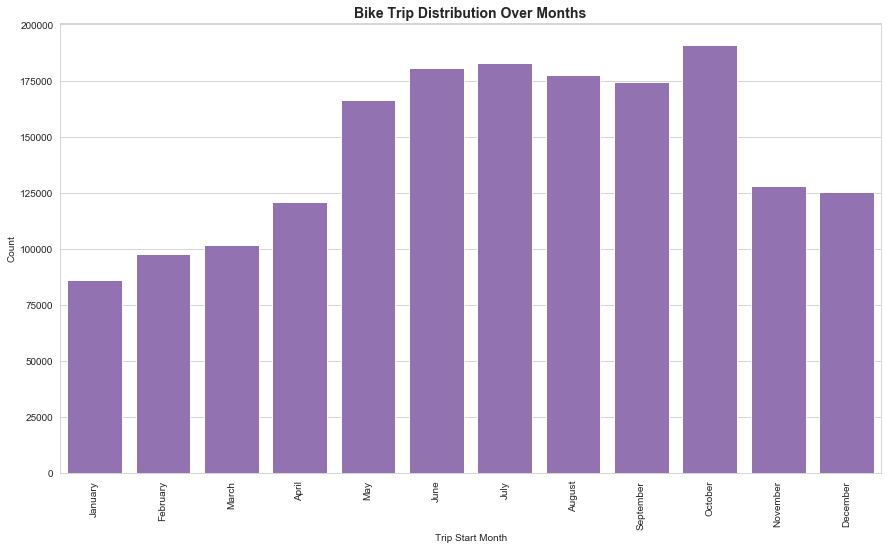

In [30]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = [14.7, 8.27])
sns.countplot(data= data_clean, x='start_month', color=base_color);
plt.xticks(rotation=90);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');
plt.title('Bike trip distribution over months'.title(),fontsize = 14, weight = 'bold');

#### Observations

- The trip distribution over hours of the day peaks around 8am-9am and 17pm-18pm. This is normal as they are usually the typical rush hours,i.e people commute to their work places
- From the trip distribution over day of week plot, it is evident that the majority of rides occur during work days (Mon-Fri) probably for commuting.
- From the trip distribution over month plot, October had the most ride trips compared to the others. However, there were more rides during summer time (May-Sept),obviously the weather is better during this period in the area.   


#### How are the User type distributed?

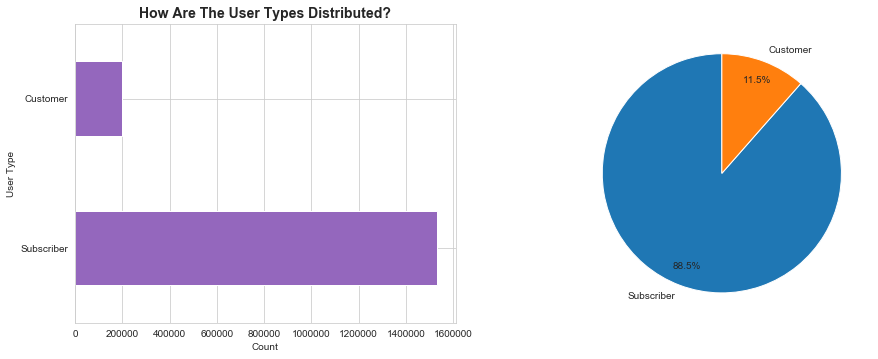

In [34]:
# countplot of user type
count_user_type = data_clean['user_type'].value_counts()
labels_user = count_user_type.index

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = [15, 5.5])


plt.subplot(1, 2, 1);
count_user_type.plot(kind='barh', color = base_color);
plt.xlabel('Count');
plt.ylabel('User Type');
plt.title('How are the User types distributed?'.title(),fontsize = 14, weight = 'bold');


plt.subplot(1, 2, 2);
plt.pie(count_user_type, autopct='%1.1f%%',startangle=90, labels = labels_user, pctdistance = 0.83);

#### How is the gender distributed?

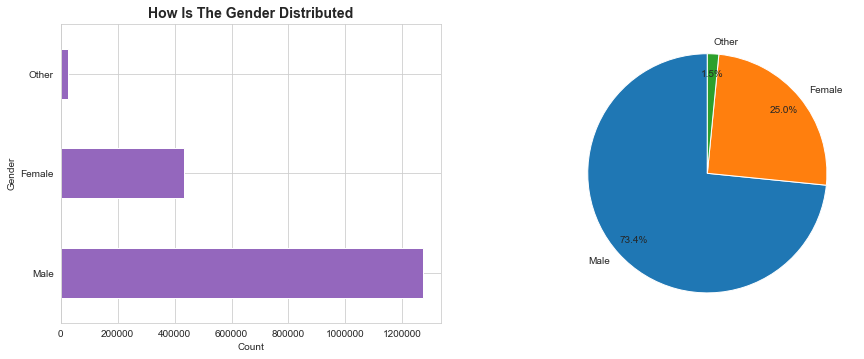

In [35]:
# countplot of gender
count_gender = data_clean['member_gender'].value_counts()
labels_gender = count_gender.index

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = [15, 5.5])

plt.subplot(1, 2, 1);
count_gender.plot(kind='barh', color = base_color);
plt.xlabel('Count');
plt.ylabel('Gender');
plt.title('How is the gender distributed'.title(),fontsize = 14, weight = 'bold');

plt.subplot(1, 2, 2);
plt.pie(count_gender, autopct='%1.1f%%',startangle=90, labels = labels_gender, pctdistance = 0.83);


#### How are the member's age distributed?

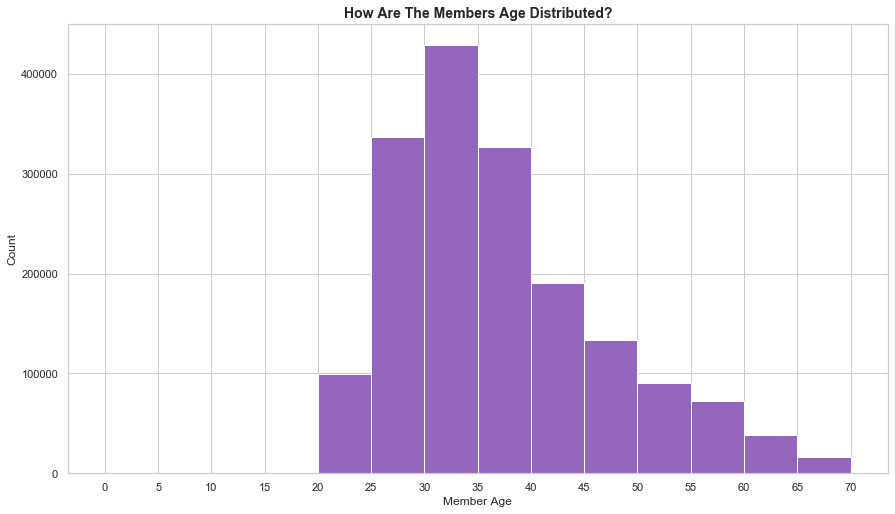

In [39]:
sns.set_style("whitegrid")
sns.set_context('notebook')
fig, ax = plt.subplots(figsize = [14.7, 8.27])
bins = np.arange(0, data_clean['member_age'].max()+5, 5)
plt.hist(data = data_clean, x='member_age', bins=bins, color = base_color);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');
plt.title('How are the members age distributed?'.title(),fontsize = 14, weight = 'bold');

#### Observations

- Most of the bike riders were male.
- Most members were around 25 to 40 years old
- As the members age gets higher, bike usage dropped significantly. 
 

#### Bike trips duration distribution

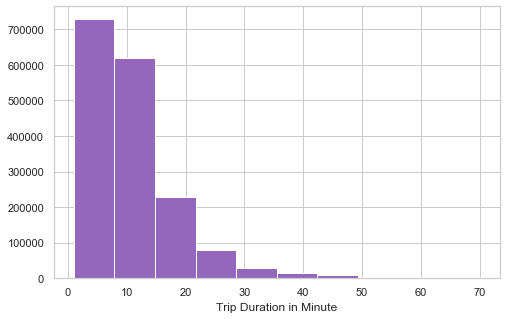

In [205]:
# checking for outliers in trip duration
sns.set_style("whitegrid")
sns.set_context('notebook')
fig, ax = plt.subplots(figsize = [8, 5])
plt.hist(data=data_clean, x='duration_minute', color = base_color);
plt.xlabel('Trip Duration in Minute');

In [163]:
data_clean['duration_minute'].describe(percentiles=[.99])

count    1.732368e+06
mean     1.288577e+01
std      3.241503e+01
min      1.016667e+00
50%      9.050000e+00
99%      6.433333e+01
max      1.438017e+03
Name: duration_minute, dtype: float64

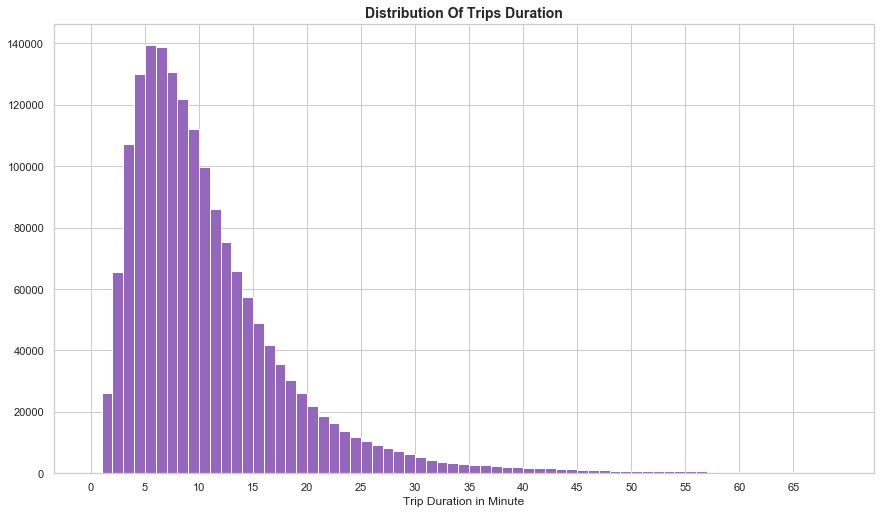

In [40]:
sns.set_style("whitegrid")
sns.set_context('notebook')
fig, ax = plt.subplots(figsize = [14.7, 8.27])
bins = np.arange(0, 70, 1)
ticks = np.arange(0, 70, 5)
plt.hist(data= data_clean, x='duration_minute', bins=bins, color = base_color);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');
plt.title('Distribution of trips duration'.title(),fontsize = 14, weight = 'bold');

#### Observations

- From the figure above,approximaetly 99% of the trips were less than 60 mins long with most of them falling between 5 to 10 minutes range.
- There were obvious outliers in the duration, hence, they should be removed for this study to allow focusing on the most common cases to explore the pattern.

In [49]:
# filter out outlier trip records
data_clean = data_clean.query('duration_minute <= 70')
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716832 entries, 3 to 1732367
Data columns (total 22 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        int64  
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
 16  duration_minute          float64
 17  start_date               object 
 18  start_hourofday          int64  
 19  start_dayofweek          object 
 20  start_month              object 
 21  member_a

## Bivariate Exploration


#### Trip duration distribution  by user type

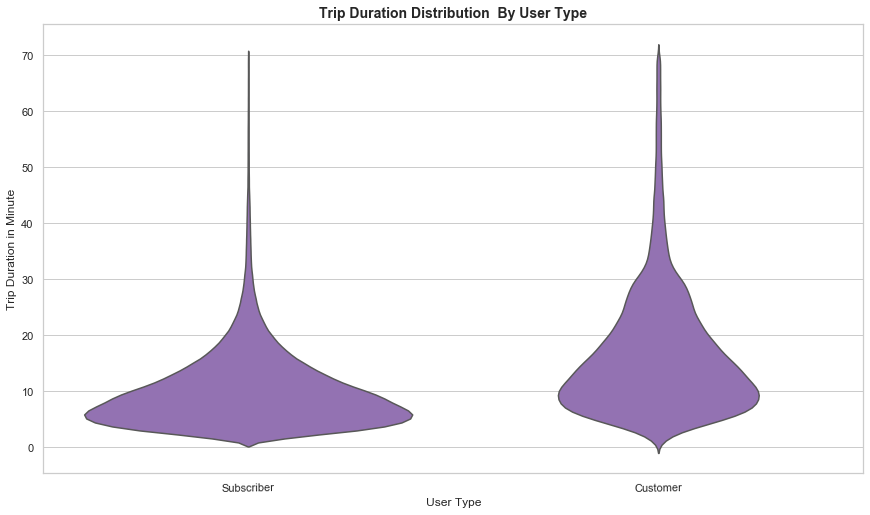

In [59]:
sns.set_style("whitegrid")
sns.set_context('notebook')
fig, ax = plt.subplots(figsize = [14.70, 8.27])
sns.violinplot(data = data_clean,x = 'user_type',y='duration_minute',color = base_color ,inner=None);
plt.xticks(rotation=1);
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title('Trip duration distribution  by user type'.title(),fontsize = 14, weight = 'bold');

#### Observations

- Subscribers have more usage on shorter and quicker trip overall compared to regular riders. 
- Customers generally rented the bikes for longer periods than suscribers.   


#### Trip duration distribution by gender

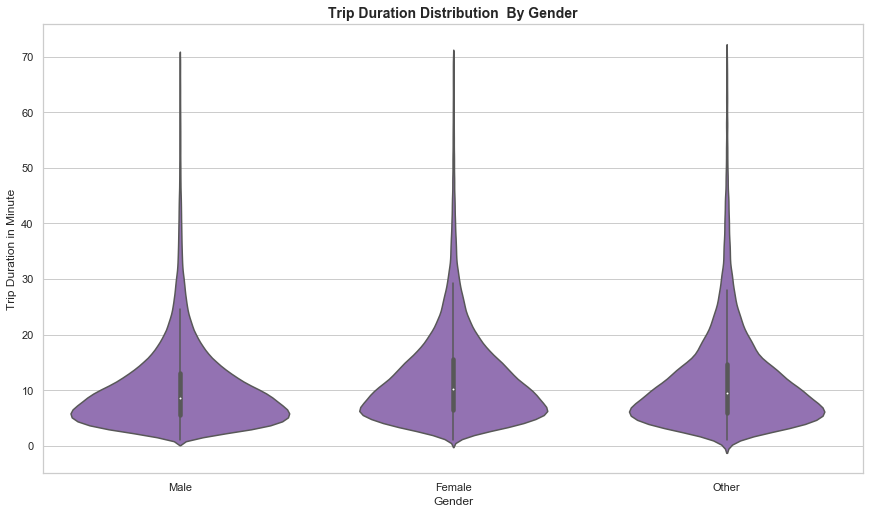

In [60]:
sns.set_style("whitegrid")
sns.set_context('notebook')
fig, ax = plt.subplots(figsize = [14.70, 8.27])
sns.violinplot(data=data_clean, x='member_gender', y='duration_minute', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');
plt.title('Trip duration distribution  by gender'.title(),fontsize = 14, weight = 'bold');

#### Observations

The difference is minute although male riders tend to have shorter trips compared to female riders 


#### Trip duration distribution by weekdays

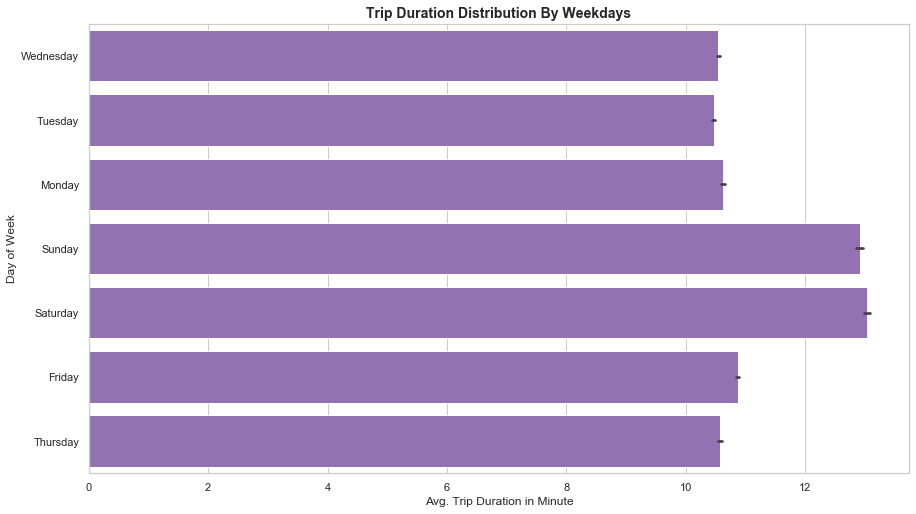

In [61]:
sns.set_style("whitegrid")
sns.set_context('notebook')
fig, ax = plt.subplots(figsize = [14.70, 8.27])
sns.barplot(data= data_clean, y='start_dayofweek', x='duration_minute', color=base_color);
plt.xlabel('Avg. Trip Duration in Minute');
plt.ylabel('Day of Week');
plt.title('Trip duration distribution by weekdays'.title(),fontsize = 14, weight = 'bold');

#### Observations

The riders tend to ride for a smaller and uniform amount of time during weekdays as compared to the weekends which is more flexible. 


#### Trip duration distribution by month

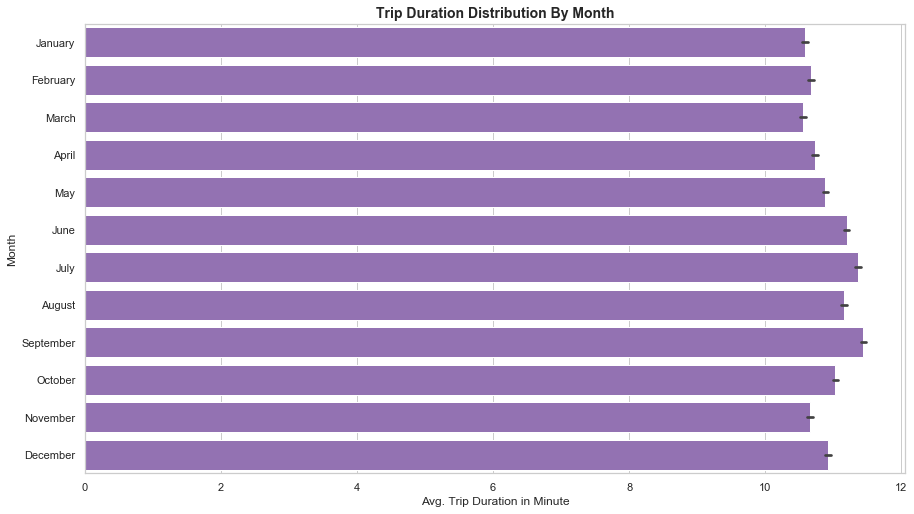

In [62]:
sns.set_style("whitegrid")
sns.set_context('notebook')
fig, ax = plt.subplots(figsize = [14.70, 8.27])
sns.barplot(data=data_clean, y='start_month', x='duration_minute', color=base_color);
plt.xlabel('Avg. Trip Duration in Minute');
plt.ylabel('Month');
plt.title('Trip duration distribution by month'.title(),fontsize = 14, weight = 'bold');

#### Observations

It can be observed that the average usage time by month increaed during the summer season until October where it declined. This could be probably as a result of the weather in the area.

#### How does the member age varies with weekly rides?

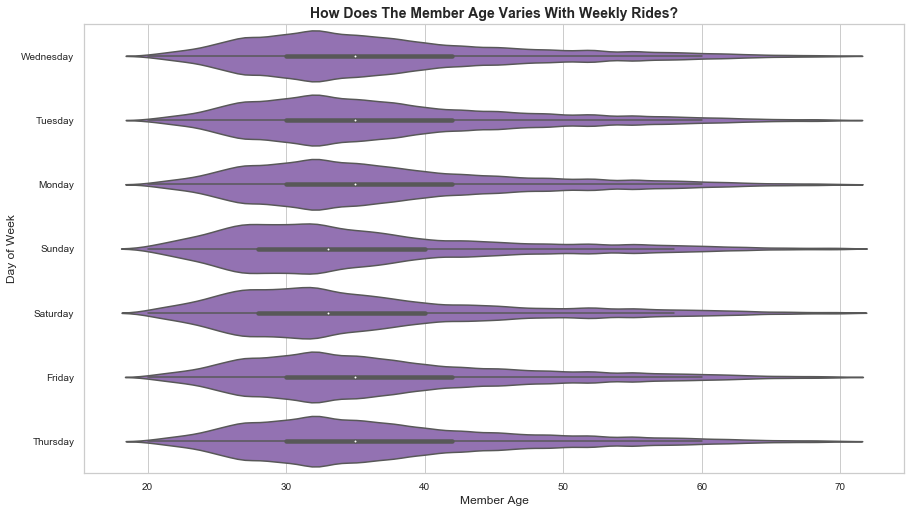

In [63]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = [14.70, 8.27])
sns.violinplot(data = data_clean, y = 'start_dayofweek', x = 'member_age', color =base_color)
ax.tick_params(axis = 'both', which = 'major',labelsize = 10)
plt.xlabel('Member Age');
plt.ylabel('Day of Week');
plt.title('How does the member age varies with weekly rides?'.title(),fontsize = 14, weight = 'bold');

#### Observations

From the above plot, weekday riders are slightly older than weekend riders. This might be as a result of younger riders commuting to work during weekdays.  

#### How does the user type varies with weekly rides?

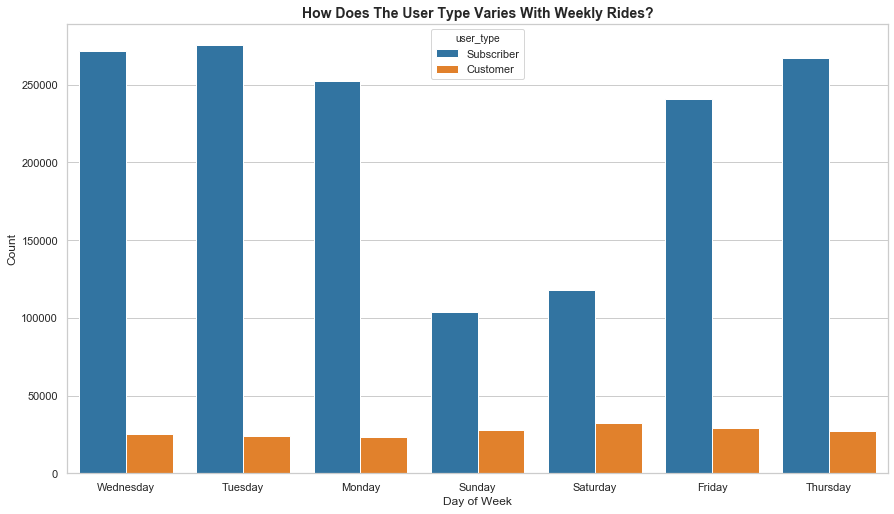

In [64]:
sns.set_style("whitegrid")
sns.set_context('notebook')
fig, ax = plt.subplots(figsize = [14.70, 8.27])
sns.countplot(data= data_clean, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('How does the user type varies with weekly rides?'.title(),fontsize = 14, weight = 'bold');

#### Observations

From the plot above, we can see that the overall, the suscribers have a higher usage than the customers. However, there was a drop of volume on weekends for subscribers  and it shows that they primarily use it for work commute during weekdays and the reverse was the case for customers usage as there was a slight increase on weekends. This implies that the use was more for leisure and relaxing purposes.  

#### How does the user type varies with member age?

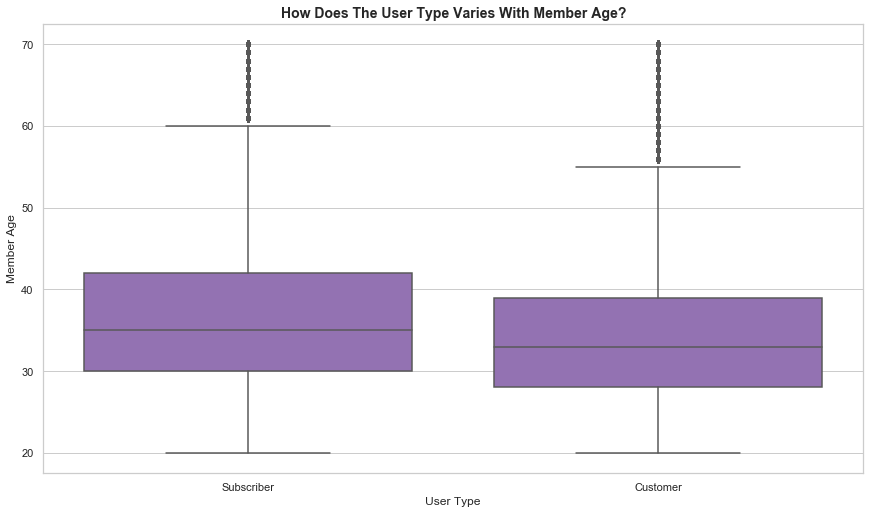

In [65]:
sns.set_style("whitegrid")
sns.set_context('notebook')
fig, ax = plt.subplots(figsize = [14.7, 8.27])
sns.boxplot(data=data_clean, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');
plt.title('How does the user type varies with member age?'.title(),fontsize = 14, weight = 'bold');

#### Observations

We observed that subscribers are slightly older than customers, with a wider range of ages as well. 

## Multivariate Exploration


#### Variation of average trip duration with weekdays and user type

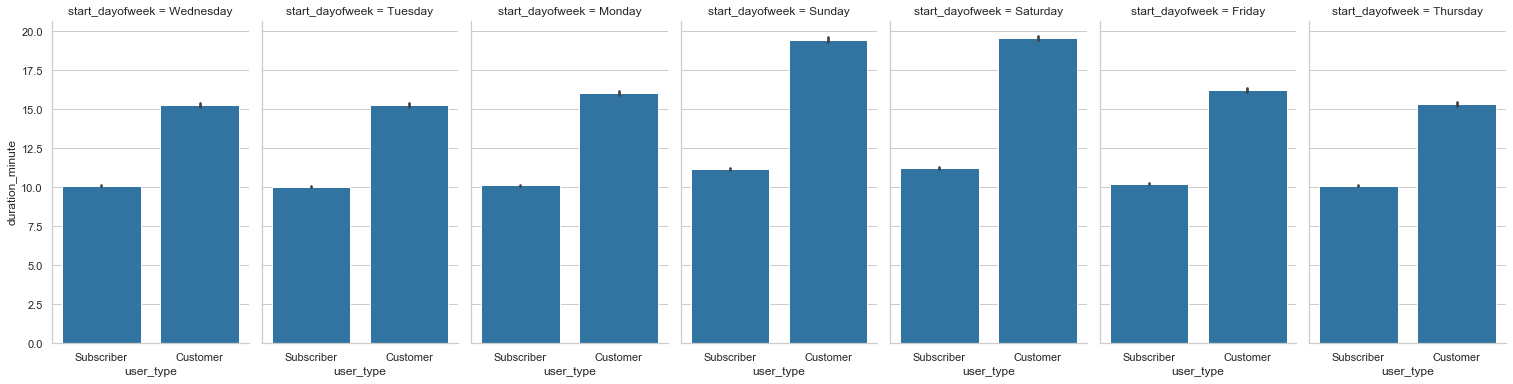

In [73]:
sns.set_style("whitegrid")
g = sns.FacetGrid(data_clean, col='start_dayofweek', height=5.5, aspect=.55)
g.map(sns.barplot, "user_type", 'duration_minute');


#### Observations

We observed that subscribers ride much shorter trips compared than customers on each day of the week. Both user types have a significant increase of trip duration on weekends. Subscribers seems to have a much stable average usage than customers overall from Monday through Friday.     


#### How does the hourly usage vary during weekdays for both user types?

In [67]:
# Grouping user types to obtain their counts

customer_data = data_clean.query('user_type == "Customer"')

customer_count = customer_data.groupby(['start_dayofweek', 'start_hourofday']).size().reset_index(name='count')

customer_heatmap_pivotdata = customer_count.pivot(index='start_dayofweek', columns='start_hourofday', values='count')



suscribers_data = data_clean.query('user_type == "Subscriber"')

suscribers_count = suscribers_data.groupby(['start_dayofweek', 'start_hourofday']).size().reset_index(name='count')

suscribers_heatmap_pivotdata = suscribers_count.pivot(index='start_dayofweek', columns='start_hourofday', values='count')

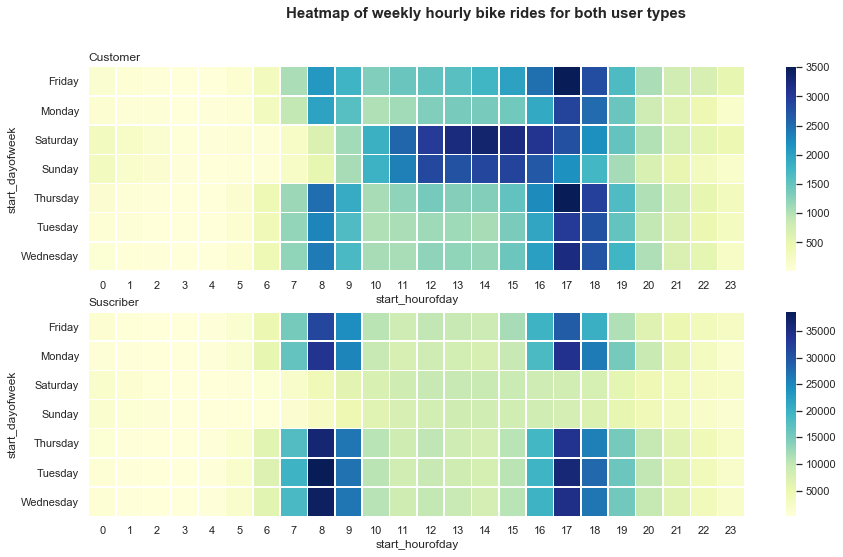

In [71]:
f, ax = plt.subplots(figsize=(14.7, 8.27))
plt.suptitle('Heatmap of weekly hourly bike rides for both user types', fontsize = 15, weight = 'bold')
plt.subplot(2, 1, 1)
sns.heatmap(customer_heatmap_pivotdata, cmap='YlGnBu',linewidths=.5);
plt.title('Customer', loc='left');


plt.subplot(2, 1, 2)
sns.heatmap(suscribers_heatmap_pivotdata, cmap='YlGnBu',linewidths=.5);
plt.title('Suscriber', loc='left');

#### Observations

From the heatmap above,we can clearly see the different usage pattern between the user types; subscribers have a higher bike rides during weekdays i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Majority of the rides are concentrated between 8-9am and 17-18pm on work days for subscribers when used for work commute,however, customers tend to have a higher usage in the evenings around 17pm from  Mondays to Fridays.  

## Summary

> Our analysis of Bay Wheels Ride Data for 2018 revealed that are two different user groups for the bike sharing system. The subscriber group and the customer group. The subscriber group consisted of 89% of the total bike sharing system while customers group consisted of 11%. There were more male riders than female riders. Riders in this age bracket (25 to 40) years old tend to have a higher bike usage and this usage drops with increasing age.
Subscribers tended to have much shorter trips compared to customers and they use the system heavily on work days mainly between 8-9am and 17-18pm for work commute, whereas customers ride a lot over weekends and in the afternoon for leisure and tour purposes. 
Majority of the rides from these two groups occurred in the summer season and the less during the winter months.